### XYZ Corp is a finance lending organisation, provides finance to individuals as well as institutes.
#### In general, whenever an individual/corporation applies for a loan from a bank or any lending org., their credit history undergoes a rigorous check to ensure that whether they are capable enough to pay off the loan. It is referred to as credit-worthiness.

### Objective:-
#### Based on the data that is available during loan application, build a model to predict default in the future. This will help the company in deciding whether or not to pass the loan.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%time df=pd.read_table(r'F:\pramod\Project\Final Project\XYZCorp_LendingData.txt',parse_dates=['issue_d'])

<string>:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 1min 53s


In [4]:
df1=df.copy()

# EDA

Here as only 5% are defaulter which means dataset is biased.

In [5]:
total=len(df1['default_ind'])
defaulter=len(df1[df1['default_ind']==1])
no_defaulter=len(df1[df1['default_ind']==0])
per_default=defaulter/total*100
per_no_default=no_defaulter/total*100

print("Percentage defaulter in a dataset= ",per_default)
print("Percentage not defaulter in a dataset= ",per_no_default)

Percentage defaulter in a dataset=  5.428584446399344
Percentage not defaulter in a dataset=  94.57141555360066


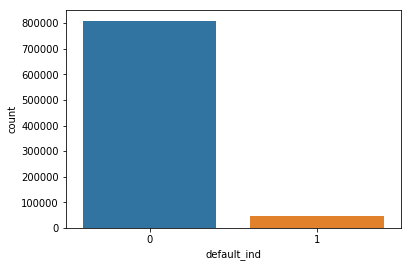

In [6]:
sns.countplot(x=df1.default_ind)

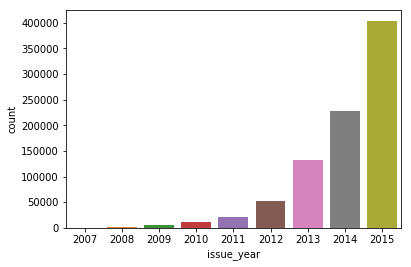

In [7]:
df1['issue_year'] = df1['issue_d'].dt.year
sns.countplot(x=df1.issue_year)

(Text(0.5,1,'default_ind=0 vs issue_year'),
 Text(0.5,1,'default_ind=1 vs issue_year'))

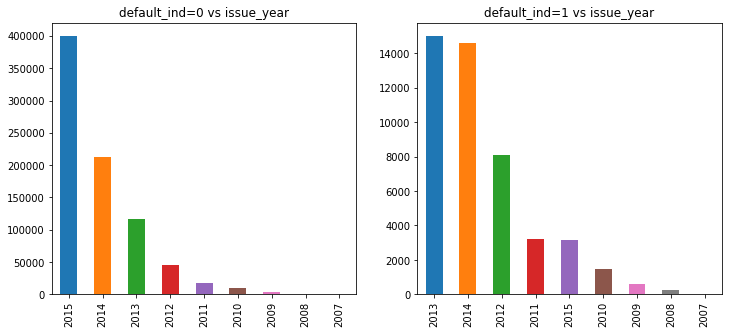

In [8]:
fig,array=plt.subplots(1,2,figsize=(12,5))
df1.loc[df1['default_ind']==0,'issue_year'].value_counts().plot.bar(ax=array[0])
df1.loc[df1['default_ind']==1,'issue_year'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs issue_year'),array[1].set_title('default_ind=1 vs issue_year')

 ## 75% of the loans are issued in 2014 and 2015, which indicates XYZ corp business significantly increased. In case of defaulter 2013-2014 showing higest nos. 2015 is most profitable year as no of loan disburse increased and defaulter get reduced significantly.

## Loan Purpose:-
 
***Debt Consolidation-  350K loans — or 58% from the total.
Credit Card  — more than 130K (~20%)
Home Improvement *— more than 135K (~6%)
Other Purposes — less than 30K (~4%)***

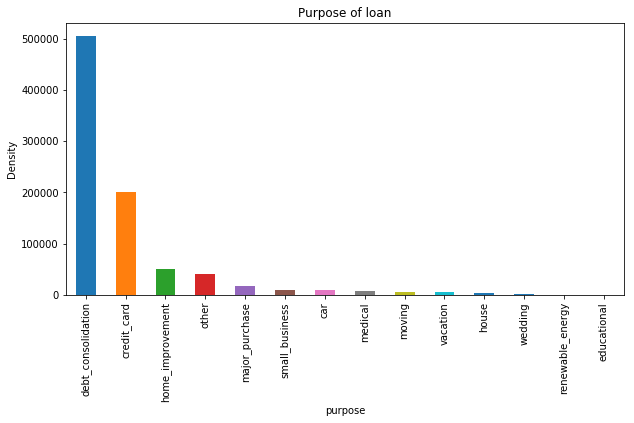

In [9]:
df1.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

(Text(0.5,1,'default_ind=0 vs grade'), Text(0.5,1,'default_ind=1 vs grade'))

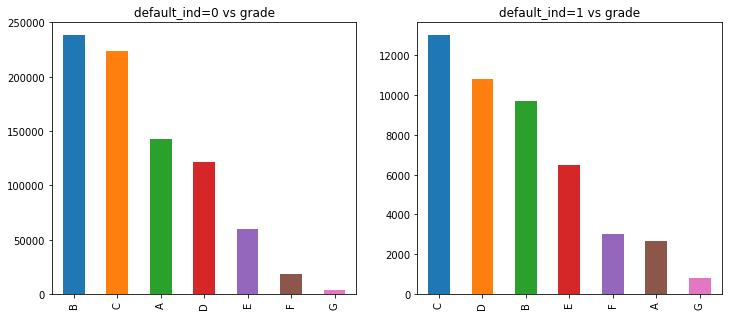

In [10]:
fig,array=plt.subplots(1,2,figsize=(12,5))
df1.loc[df1['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
df1.loc[df1['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

In [ ]:
df1['income_category'] = np.nan
df1.loc[df1['annual_inc'] <= 100000,'income_category'] = 'Low'
df1.loc[(df1['annual_inc'] > 100000) & (df1['annual_inc'] <= 200000),'income_category'] = 'Medium'
df1.loc[df1['annual_inc'] > 200000,'income_category'] = 'High'

In [ ]:
pd.crosstab(df1.purpose,df1.default_ind)

## Missing Value Treatment

In [11]:
df1.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

## Observed multiple variables having missing values more than 50%. Hence removing such variables.|

In [12]:
df1.dropna(thresh=len(df1)/2,axis=1,inplace=True)

In [13]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

next_pymnt_d                  29.553757
total_rev_hi_lim               7.863953
tot_cur_bal                    7.863953
tot_coll_amt                   7.863953
emp_title                      5.776261
emp_length                     5.030673
last_pymnt_d                   1.035318
revol_util                     0.052105
collections_12_mths_ex_med     0.006542
last_credit_pull_d             0.005841
title                          0.003855
purpose                        0.000000
pymnt_plan                     0.000000
zip_code                       0.000000
issue_d                        0.000000
verification_status            0.000000
annual_inc                     0.000000
home_ownership                 0.000000
issue_year                     0.000000
installment                    0.000000
sub_grade                      0.000000
grade                          0.000000
dti                            0.000000
int_rate                       0.000000
term                           0.000000


In [14]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'issue_year'],
      dtype='object')

In [15]:
df1.drop(['id','member_id','loan_amnt','funded_amnt','sub_grade','emp_title','issue_d','pymnt_plan','title','zip_code','addr_state',
          'earliest_cr_line','out_prncp','total_pymnt_inv','total_rec_prncp','collection_recovery_fee','last_pymnt_d','next_pymnt_d',
          'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','tot_coll_amt','total_rev_hi_lim','issue_year'],axis=1,inplace=True)

In [16]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

tot_cur_bal            7.863953
emp_length             5.030673
revol_util             0.052105
default_ind            0.000000
inq_last_6mths         0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
purpose                0.000000
dti                    0.000000
delinq_2yrs            0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
total_acc              0.000000
initial_list_status    0.000000
out_prncp_inv          0.000000
total_pymnt            0.000000
total_rec_int          0.000000
total_rec_late_fee     0.000000
recoveries             0.000000
last_pymnt_amnt        0.000000
acc_now_delinq         0.000000
funded_amnt_inv        0.000000
dtype: float64

### Replacing numerical missing values by median and catagorical by mode

In [17]:
 for c in df1.columns:
        if df1[c].dtype == 'object':
            df1.fillna(df1[c].mode()[0],inplace=True)
        else:
            df1.fillna(df1[c].median(),inplace=True)

In [18]:
df1.isnull().sum()

funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp_inv          0
total_pymnt            0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_pymnt_amnt        0
acc_now_delinq         0
tot_cur_bal            0
default_ind            0
dtype: int64

As Given data is biased, We are going for under sampling

In [19]:
df1.dtypes

funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
initial_list_status     object
out_prncp_inv          float64
total_pymnt            float64
total_rec_int          float64
total_rec_late_fee     float64
recoveries             float64
last_pymnt_amnt        float64
acc_now_delinq         float64
tot_cur_bal            float64
default_ind              int64
dtype: object

In [20]:
df1.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [21]:
df1['term_1'] = np.nan

In [22]:
df1.loc[df1['term'] == "36 months",'term_1'] = 0
df1.loc[df1['term'] == "60 months",'term_1'] = 1

In [26]:
df1.term.dtype

dtype('O')

In [27]:
pd.crosstab(df1['term'],df1['default_ind'])

default_ind,0,1
term,,
36 months,570423,29798
60 months,239079,16669


In [28]:
df1.grade.value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [29]:
pd.crosstab(df1['grade'],df1['default_ind'])

default_ind,0,1
grade,,
A,143001,2664
B,238281,9717
C,223853,13002
D,122004,10798
E,59989,6459
F,18315,3013
G,4059,814



### Creating beans for variable Grade 
A=1, B=2, C=3,D=4, E=5, F=5, G=5

	0	1	Total	Good Population Percentage	Bad Population Percentageulation Percentage	WOE	IV	Bad rate	Population Percentage
A	143001	2664	145665	17.67%	5.73%	-1.12536753	0.134282543	1.83%	17%
B	238281	9717	247998	29.44%	20.91%	-0.341918381	0.029146286	3.92%	29%
C	223853	13002	236855	27.65%	27.98%	0.011768945	3.85282E-05	5.49%	28%
D	122004	10798	132802	15.07%	23.24%	0.432962441	0.035355749	8.13%	16%
E	82363	10286	92649	10.17%	22.14%	0.777302781	0.092974244	11.10%	11%
F									
G									
Total	809502	46468	855969						
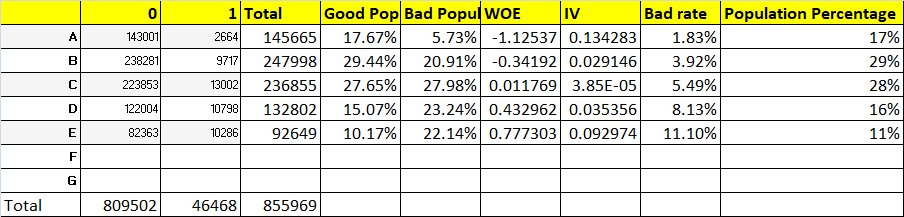

In [30]:
df1['grade_cat'] = np.nan
df1.loc[df1['grade'] == "A",'grade_cat'] = 1
df1.loc[df1['grade'] == "B",'grade_cat'] = 2
df1.loc[df1['grade'] == "C",'grade_cat'] = 3
df1.loc[df1['grade'] == "D",'grade_cat'] = 4
df1.loc[df1['grade'] == "E",'grade_cat'] = 5
df1.loc[df1['grade'] == "F",'grade_cat'] = 5
df1.loc[df1['grade'] == "G",'grade_cat'] = 5

In [31]:
pd.crosstab(df1['emp_length'],df1['default_ind'])

default_ind,0,1
emp_length,,
13000.0,40465,2596
1 year,51796,3059
10+ years,268582,13508
2 years,71867,4119
3 years,63754,3638
4 years,47802,2841
5 years,50532,3280
6 years,38688,2758
7 years,40531,2673


In [32]:
df1.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
13000.0       43061
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [33]:
df1['emp_cat'] = np.nan
df1.loc[df1['emp_length'] == "< 1 year",'emp_cat'] = 1
df1.loc[df1['emp_length'] == "1 year",'emp_cat'] = 2
df1.loc[df1['emp_length'] == "2 years",'emp_cat'] = 3
df1.loc[df1['emp_length'] == "3 years",'emp_cat'] = 4
df1.loc[df1['emp_length'] == "4 years",'emp_cat'] = 5
df1.loc[df1['emp_length'] == "5 years",'emp_cat'] = 6
df1.loc[df1['emp_length'] == "6 years",'emp_cat'] = 7
df1.loc[df1['emp_length'] == "7 years",'emp_cat'] = 8
df1.loc[df1['emp_length'] == "8 years",'emp_cat'] = 9
df1.loc[df1['emp_length'] == "9 years",'emp_cat'] = 10
df1.loc[df1['emp_length'] == "10+ years",'emp_cat'] = 11
df1.loc[df1['emp_length'] == 13000.0,'emp_cat'] = 12

In [34]:
df1.emp_cat.value_counts()

11.0    282090
3.0      75986
1.0      67597
4.0      67392
2.0      54855
6.0      53812
5.0      50643
8.0      43204
12.0     43061
9.0      42421
7.0      41446
10.0     33462
Name: emp_cat, dtype: int64

In [35]:
pd.crosstab(df1['home_ownership'],df1['default_ind'])

default_ind,0,1
home_ownership,,
ANY,3,0
MORTGAGE,408730,20376
NONE,38,7
OTHER,117,27
OWN,80001,4135
RENT,320613,21922


### Creating beans for variable home_ownership. 
Any=None=Other=Own=1, Mortgage=2, Rent=3
home_ownership	0	1	Total	Good Population Percentage	Bad Population Percentageulation Percentage	WOE	IV	Bad rate	Population Percentage
ANY	NA	NA	0	0	0	NA	NA	NA	0
NONE	NA	NA	0	0	0	NA	NA	NA	0
OTHER	NA	NA	0	0	0	NA	NA	NA	0
OWN	80159	4169	84328	0.099022609	0.089719586	-0.098659103	0.000917828	0.049437909	0.098517587
MORTGAGE	408730	20376	429106	0.504915368	0.438504745	-0.141020193	0.009365239	0.047484771	0.501310211
RENT	320613	21922	342535	0.396062023	0.471775669	0.174932771	0.013244798	0.063999299	0.400172202
Total	809502	46467	855969						
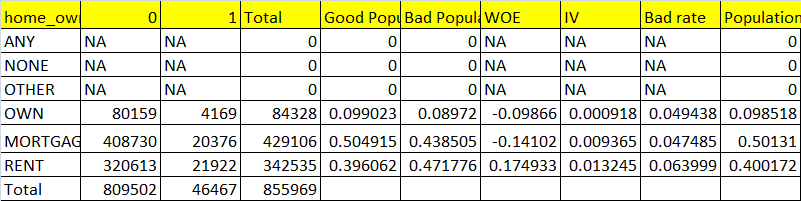
					

In [36]:
df1['home_own_cat'] = np.nan
df1.loc[df1['home_ownership'] == "ANY",'home_own_cat'] = 1
df1.loc[df1['home_ownership'] == "NONE",'home_own_cat'] = 1
df1.loc[df1['home_ownership'] == "OTHER",'home_own_cat'] = 1
df1.loc[df1['home_ownership'] == "OWN",'home_own_cat'] = 1
df1.loc[df1['home_ownership'] == "MORTGAGE",'home_own_cat'] = 2
df1.loc[df1['home_ownership'] == "RENT",'home_own_cat'] = 3

In [37]:
pd.crosstab(df1['verification_status'],df1['default_ind'])

default_ind,0,1
verification_status,,
Not Verified,245256,12486
Source Verified,303976,14202
Verified,260270,19779


In [38]:
df1['verification_status_cat'] = np.nan
df1.loc[df1['verification_status'] == "Not Verified",'verification_status_cat'] = 1
df1.loc[df1['verification_status'] == "Source Verified",'verification_status_cat'] = 2
df1.loc[df1['verification_status'] == "Verified",'verification_status_cat'] = 3

In [39]:
pd.crosstab(df1['initial_list_status'],df1['default_ind'])

default_ind,0,1
initial_list_status,,
f,408954,33601
w,400548,12866


In [40]:
df1['initial_list_status_cat'] = np.nan
df1.loc[df1['initial_list_status'] == "f",'initial_list_status_cat'] = 1
df1.loc[df1['initial_list_status'] == "w",'initial_list_status_cat'] = 2

In [41]:
df1.dtypes

funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
purpose                     object
dti                        float64
delinq_2yrs                float64
inq_last_6mths             float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp_inv              float64
total_pymnt                float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
last_pymnt_amnt            float64
acc_now_delinq             float64
tot_cur_bal                float64
default_ind                  int64
term_1              

In [42]:
from sklearn import preprocessing
colname=['purpose']
colname
##for processing the data
from sklearn import preprocessing
#creating dictionary"""
le={}
for x in colname:
    le[x]=preprocessing.LabelEncoder()  ## generating levels
    
for x in colname:     ### assigning levels
    df1[x]=le[x].fit_transform(df1[x])
    
df1.head()

,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,acc_now_delinq,tot_cur_bal,default_ind,term_1,grade_cat,emp_cat,home_own_cat,verification_status_cat,initial_list_status_cat
0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,1,...,171.62,0.0,13000.0,0,NaN,2.0,11.0,3.0,3.0,1.0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,...,119.66,0.0,13000.0,1,NaN,3.0,1.0,3.0,2.0,1.0
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,11,...,649.91,0.0,13000.0,0,NaN,3.0,11.0,3.0,1.0,1.0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,9,...,357.48,0.0,13000.0,0,NaN,3.0,11.0,3.0,2.0,1.0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,9,...,67.79,0.0,13000.0,0,NaN,2.0,2.0,3.0,2.0,1.0


In [43]:
df1.dtypes.value_counts()

float64    26
object      6
int64       2
dtype: int64

In [44]:
df1.isnull().sum()

funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
purpose                         0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp_inv                   0
total_pymnt                     0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
last_pymnt_amnt                 0
acc_now_delinq                  0
tot_cur_bal                     0
default_ind                     0
term_1                     855969
grade_cat     

In [46]:
df1.drop(['grade','term','emp_length','home_ownership','verification_status','initial_list_status',
          'term_1'],axis=1, inplace=True)

In [47]:
df1.dtypes.value_counts()

float64    25
int64       2
dtype: int64

In [48]:
df1.isnull().sum()

funded_amnt_inv            0
int_rate                   0
installment                0
annual_inc                 0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp_inv              0
total_pymnt                0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_amnt            0
acc_now_delinq             0
tot_cur_bal                0
default_ind                0
grade_cat                  0
emp_cat                    0
home_own_cat               0
verification_status_cat    0
initial_list_status_cat    0
dtype: int64

In [49]:
X = df1.copy()

In [50]:
X.columns

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'purpose',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'acc_now_delinq', 'tot_cur_bal', 'default_ind', 'grade_cat', 'emp_cat',
       'home_own_cat', 'verification_status_cat', 'initial_list_status_cat'],
      dtype='object')

In [51]:
y = X.pop('default_ind')

In [52]:
X.columns

Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'purpose',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'acc_now_delinq', 'tot_cur_bal', 'grade_cat', 'emp_cat', 'home_own_cat',
       'verification_status_cat', 'initial_list_status_cat'],
      dtype='object')

In [53]:
y.shape

(855969,)

### Model building:- Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(n_jobs=-1,C=10)
%time m.fit(X,y)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Wall time: 28.8 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred = m.predict(X)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
acc=accuracy_score(y,y_pred)
print("Accuracy of model: ",acc)

[[809469     33]
 [  2509  43958]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    809502
          1       1.00      0.95      0.97     46467

avg / total       1.00      1.00      1.00    855969

Accuracy of model:  0.997030266283008


### As data set is biased, under sampling is used to avoid overfitting

In [56]:
Non_def=df1[df1['default_ind'] == 0]

In [57]:
defaulter=df1[df1['default_ind']== 1]

In [58]:
defaulter.shape

(46467, 27)

In [59]:
Non_def.shape

(809502, 27)

In [60]:
non_def1=Non_def[:400000]

In [61]:
non_def1.shape

(400000, 27)

In [62]:
df2=non_def1.append(defaulter)

In [63]:
df2.shape

(446467, 27)

In [64]:
df2.isnull().sum()

funded_amnt_inv            0
int_rate                   0
installment                0
annual_inc                 0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp_inv              0
total_pymnt                0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_amnt            0
acc_now_delinq             0
tot_cur_bal                0
default_ind                0
grade_cat                  0
emp_cat                    0
home_own_cat               0
verification_status_cat    0
initial_list_status_cat    0
dtype: int64

In [ ]:
df2.dtypes.value_counts()

In [66]:
X1=df2.copy()

In [67]:
Y1=X1.pop('default_ind')

In [ ]:
scalar

### Creating testing data set for cross validation

In [69]:
#Creating training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X1, Y1, test_size = 0.3,
                                                 random_state = 10)

In [70]:
X_train.shape

(312526, 26)

In [71]:
Y_train.shape

(312526,)

### Model Building:-Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
#creating model
classifier=LogisticRegression()
##fitting training data to the model
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_train_pred = classifier.predict(X_train)
print(confusion_matrix(Y_train,y_train_pred))
print(classification_report(Y_train,y_train_pred))
acc=accuracy_score(Y_train,y_train_pred)
print("Accuracy of model: ",acc)

[[279886     42]
 [  1765  30833]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    279928
          1       1.00      0.95      0.97     32598

avg / total       0.99      0.99      0.99    312526

Accuracy of model:  0.9942180810556561


#### Cross Validation with testing data

In [74]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
acc=accuracy_score(Y_test,y_pred)
print("Accuracy of model: ",acc)

[[120044     28]
 [   738  13131]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    120072
          1       1.00      0.95      0.97     13869

avg / total       0.99      0.99      0.99    133941

Accuracy of model:  0.9942810640505895


**Random Forest**

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs=-1,n_estimators=100,min_samples_leaf=3)
%time classifier.fit(X_train,Y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Wall time: 1min 32s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_train_pred = classifier.predict(X_train)
print(confusion_matrix(Y_train,y_train_pred))
print(classification_report(Y_train,y_train_pred))
acc=accuracy_score(Y_train,y_train_pred)
print("Accuracy of model: ",acc)

[[279928      0]
 [   786  31812]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    279928
          1       1.00      0.98      0.99     32598

avg / total       1.00      1.00      1.00    312526

Accuracy of model:  0.9974850092472306


### Cross Validation with testing data

In [77]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
acc=accuracy_score(Y_test,y_pred)
print("Accuracy of model: ",acc)

[[120072      0]
 [   569  13300]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    120072
          1       1.00      0.96      0.98     13869

avg / total       1.00      1.00      1.00    133941

Accuracy of model:  0.9957518608939757
